<h1><div align="center">Deep Learning From Scratch</div></h1>
<h2><div align="center">Linear Regression</div></h2>
<div align="center">Bruno Gonçalves</div>
<div align="center"><a href="http://www.data4sci.com/">www.data4sci.com</a></div>
<div align="center">@bgoncalves, @data4sci</div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import watermark

%load_ext watermark
%matplotlib inline

In [2]:
%watermark -n -v -m -p numpy,matplotlib

Tue Jul 02 2019 

CPython 3.7.3
IPython 7.4.0

numpy 1.16.2
matplotlib 3.1.0

compiler   : Clang 4.0.1 (tags/RELEASE_401/final)
system     : Darwin
release    : 18.6.0
machine    : x86_64
processor  : i386
CPU cores  : 8
interpreter: 64bit


In [3]:
data = np.array(np.loadtxt("data/Anscombe1.dat"))

In [4]:
print(data)

[[10.    8.04]
 [ 8.    6.95]
 [13.    7.58]
 [ 9.    8.81]
 [11.    8.33]
 [14.    9.96]
 [ 6.    7.24]
 [ 4.    4.26]
 [12.   10.84]
 [ 7.    4.82]
 [ 5.    5.68]]


In [5]:
X = data[:, 0].reshape(-1, 1)
y = data[:, 1].reshape(-1, 1)

In [8]:
X

array([[10.],
       [ 8.],
       [13.],
       [ 9.],
       [11.],
       [14.],
       [ 6.],
       [ 4.],
       [12.],
       [ 7.],
       [ 5.]])

In [7]:
y

array([[ 8.04],
       [ 6.95],
       [ 7.58],
       [ 8.81],
       [ 8.33],
       [ 9.96],
       [ 7.24],
       [ 4.26],
       [10.84],
       [ 4.82],
       [ 5.68]])

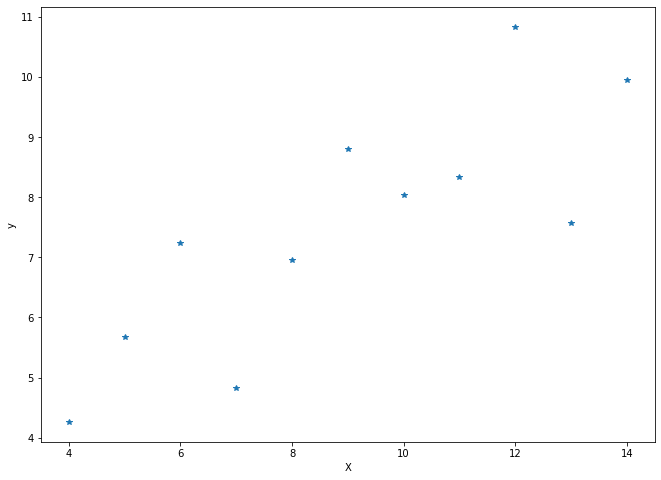

In [9]:
plt.plot(X, y, '*')
plt.xlabel('X')
plt.ylabel('y')
plt.gcf().set_size_inches(11, 8)

Get matrix dimensions and add the bias column

In [10]:
M, N = X.shape
X = np.concatenate((np.ones((M, 1)), X), axis=1) #Add x0

In [11]:
print(X)

[[ 1. 10.]
 [ 1.  8.]
 [ 1. 13.]
 [ 1.  9.]
 [ 1. 11.]
 [ 1. 14.]
 [ 1.  6.]
 [ 1.  4.]
 [ 1. 12.]
 [ 1.  7.]
 [ 1.  5.]]


Set the training parameters and initialize the weight matrix

In [12]:
alpha = 0.01
epsilon = 0.12

weights = 2*np.random.rand(N+1, 1)*epsilon - epsilon
count = 0

## Training Procedure

In [13]:
oldJ = 0
err = 1

Js = []

while err > 1e-6:
    Hs = np.dot(X, weights)
    deltas = alpha/M*np.dot(X.T, (Hs-y))

    count += 1
    weights -= deltas

    J = np.sum(np.power(Hs-y, 2.))/(2*M)
    Js.append(J)
    err = np.abs(oldJ-J)
    oldJ = J
    
    if count % 100 == 0:
        print(count, J, err, weights.flatten())

print(count, J, err, weights.flatten())

100 1.0278093163932114 0.0008768851633629282 [0.29738448 0.76771159]
200 0.9490974880611134 0.0007052897931416613 [0.5762098  0.74010244]
300 0.8857885720917197 0.0005672734733037643 [0.82627005 0.71534159]
400 0.8348684127440129 0.00045626520707353624 [1.05053277 0.69313521]
500 0.7939126865513646 0.0003669798588910034 [1.25165938 0.67321975]
600 0.7609714795823671 0.00029516652758898587 [1.43203672 0.65535887]
700 0.7344764514764041 0.00023740615976142188 [1.59380539 0.63934062]
800 0.7131661663069374 0.0001909487676429178 [1.73888515 0.62497489]
900 0.6960260352533755 0.00015358250140240504 [1.86899773 0.61209121]
1000 0.6822400117348265 0.00012352834232998156 [1.98568722 0.60053667]
1100 0.6711517391971138 9.9355403249346e-05 [2.09033841 0.59017416]
1200 0.662233301788012 7.991280356123287e-05 [2.18419323 0.5808807 ]
1300 0.6550600901313228 6.427487548876787e-05 [2.2683655 0.572546 ]
1400 0.649290585552063 5.1697092768088204e-05 [2.34385412 0.56507116]
1500 0.6446501002738868 4.158

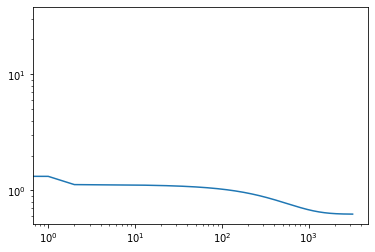

In [15]:
plt.loglog(Js)

In [16]:
weights.flatten()

array([2.90884572, 0.50912596])

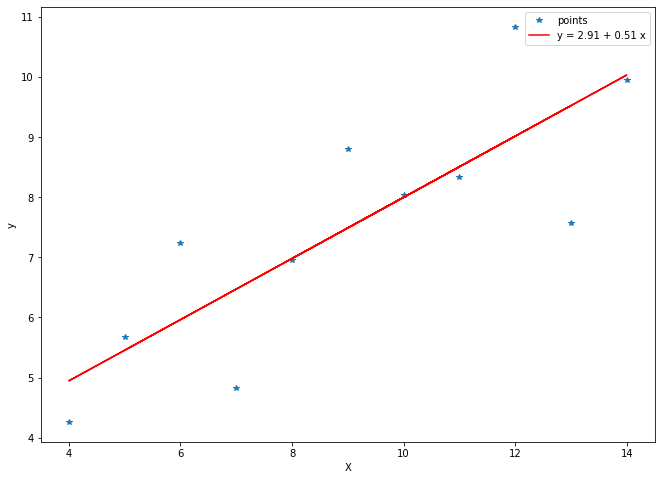

In [17]:
plt.plot(X.T[1], y, '*', label='points')
plt.plot(X.T[1], np.dot(X, weights.flatten()), 'r-', label='y = %2.2f + %2.2f x' % tuple(weights.flatten()))
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.gcf().set_size_inches(11, 8)